#Question Definition


##Context 

###Titanic dataset
On its maiden voyage on from Southampton port on April 15, 1912 the RMS Titanic sank following a collision with an iceberg.This resulted in 1502 out of 2224 passengers and crew dying. 

While many may think the survival of the passengers on board was a game of chance, it is possible to predict who had higher chances of survival.

###Spambase dataset
Receiving spam mail is frustrating but what is more frustrating is if important mail gets wrongly classifified as spam mail and you miss on important communication. Fortunately you can classify mail as spam or not which makes your interaction with mail smoother.

##Data appropriateness
Both datasets were useful for the analysis and modeling that we needed to do.

##Metric for success
###Titanic survival prediction
* Creating a model to predict the chances of survival in the titanic with an accuracy of over 80%.

###Spam mail classification
* Creating a model to classify email as either spam or not. The classifier needs to have an accuracy of over 80%

#Importing libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Loading datasets

In [0]:
data_one=pd.read_csv('train.csv')
data_two=pd.read_csv('test.csv')

In [1217]:
data_one.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1218]:
data_two.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#Data preparation


In [1219]:
data_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1220]:
print(data_one.isnull().sum())
print(data_two.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [1221]:
print(data_one.shape)
print(data_two.shape)

(891, 12)
(418, 11)


In [1222]:
data_one.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1223]:
data_two.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [1224]:
print(data_one['Age'].mode())
print(data_one['Age'].median())
print(data_two['Age'].mode())
print(data_two['Age'].median())

0    24.0
dtype: float64
28.0
0    21.0
1    24.0
dtype: float64
27.0


In [0]:
#Filling missing data
data=data_one['Age'].fillna((data_one['Age'].median()), inplace=True)
df=data_two['Age'].fillna((data_two['Age'].median()), inplace=True)

In [0]:
data=data_one.drop('Cabin', inplace=False,axis=1)
df=data_two.drop('Cabin', inplace=False,axis=1)

In [0]:
data=data.dropna(inplace=False)

In [1228]:
print(data.isnull().sum())
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


In [1229]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [1230]:
data.shape

(889, 11)

In [0]:
# def label_sex():
# # Create a list to store the data
#     encoded_sex = []
#     # For each row in the column,
#     for x in data['Sex']:
#         if x == 'female'
#             encoded_sex.append(1)      
    
#         else:
#             strata.append(4) 

#  # Create a column from the list
#     df['strata'] = strata

# #Execute the procedure
# assign_strata()

#Exploratory data analysis

##Univariate analysis

###1.Distribution

##### a. Distribution of train dataset

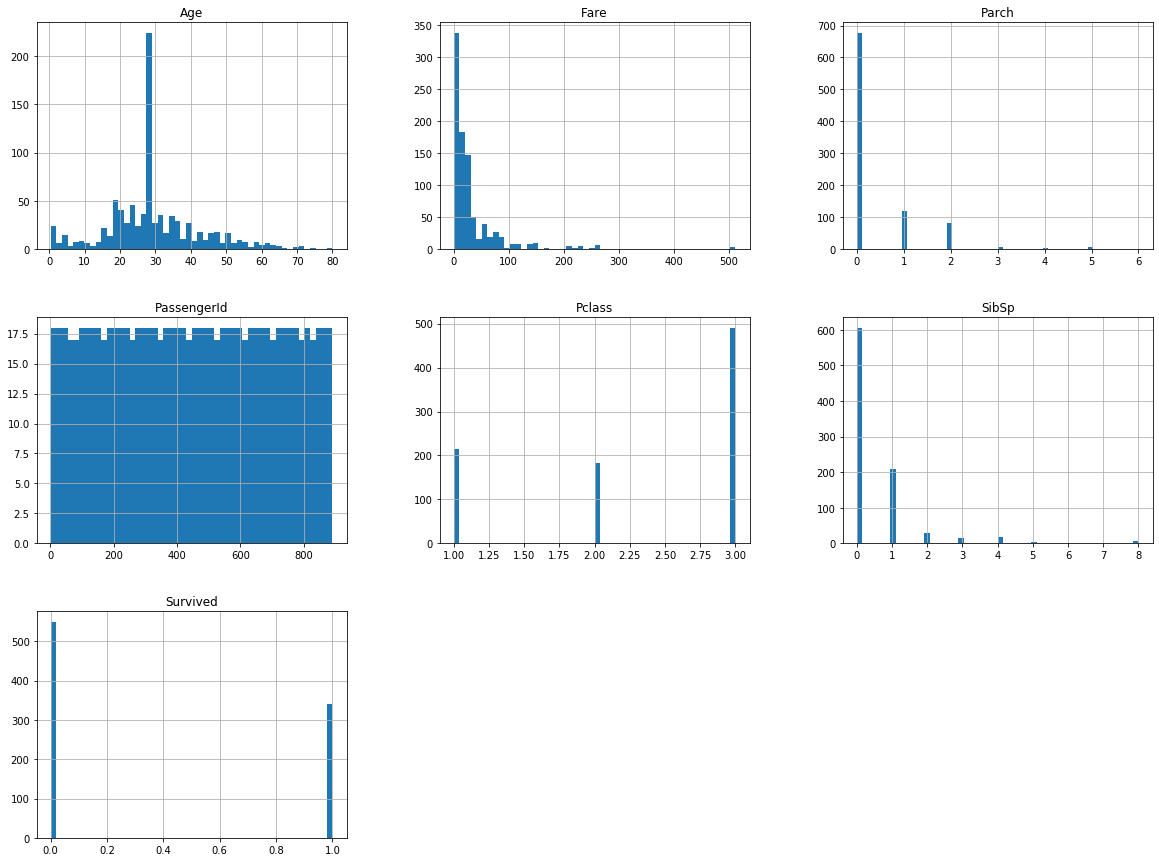

In [1232]:
data.hist(bins=50,figsize=(20,15))
plt.show()

All the numerical data is discrete apart from the Age, PassengerId and Fare data. The fare column data is highly skewed to the left while the age column although slighly skewed to the left is close to normally distributed.

b. Distribution of test dataset

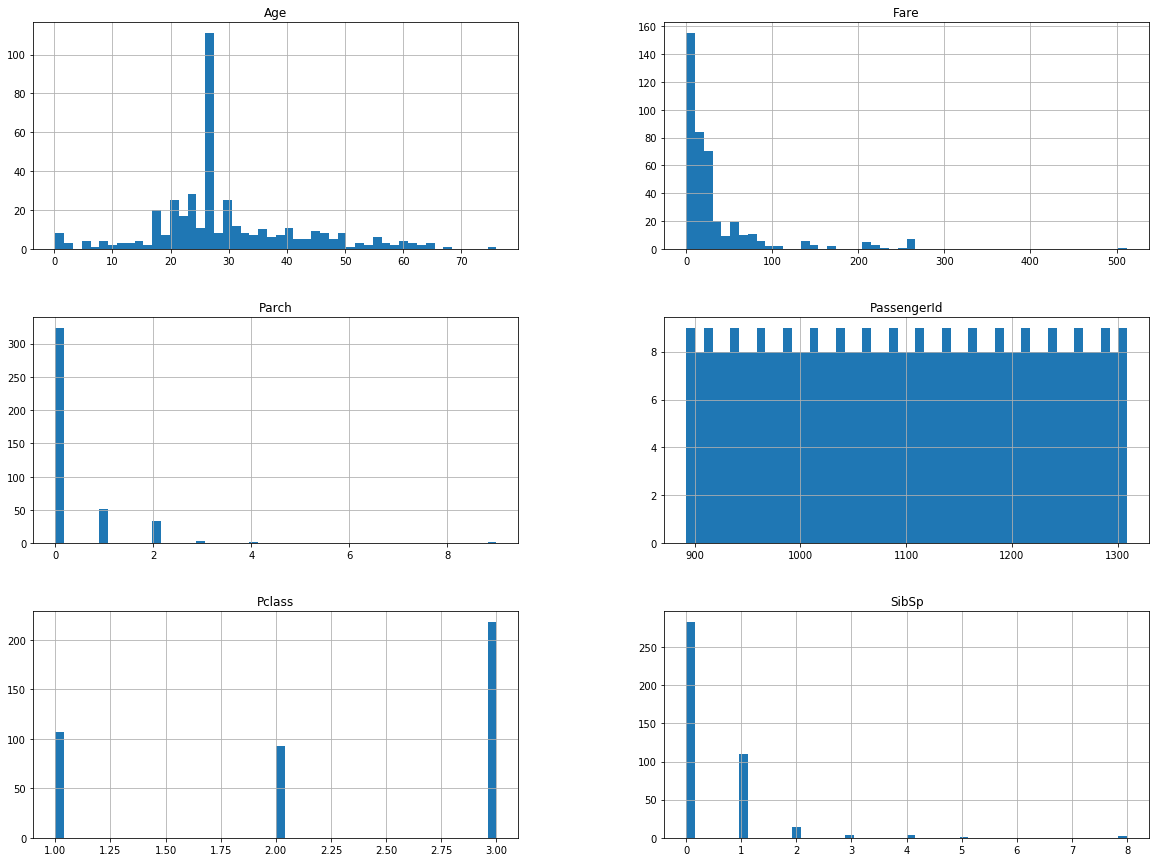

In [1233]:
df.hist(bins=50,figsize=(20,15))
plt.show()

The data is discrete apart from the Age, PassengerId and Fare data which are contimious. The fare and age data are skewed to teh left with fare being accutely skewed while age is only slightly skewed.

##Outliers

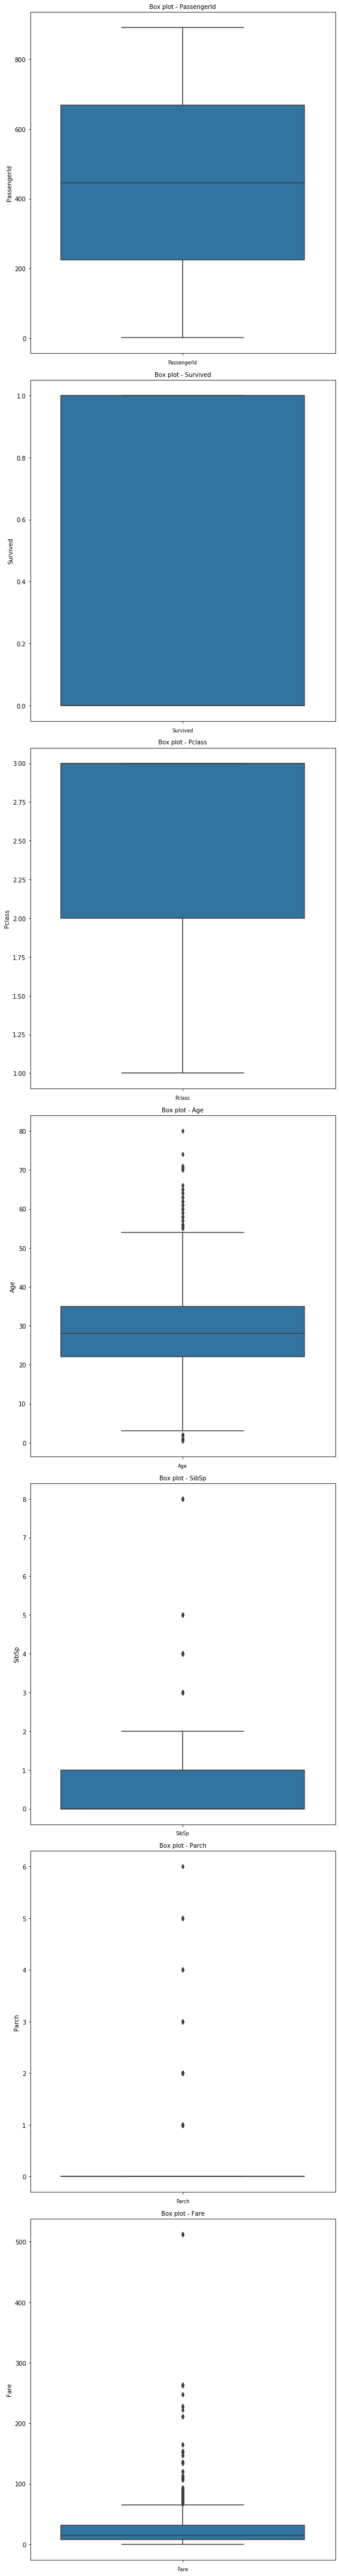

In [1234]:

#checking for outliers in our dataset
col_names = numeric_clmns = data.dtypes[data.dtypes != "object" ].index

fig, ax = plt.subplots(len(col_names), figsize=(8,60))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=data[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.tight_layout()
plt.show()

##Bivariate analysis

###Correlation

In [0]:
data_corr=data.drop('Survived', inplace=False,axis=1)

<function matplotlib.pyplot.show>

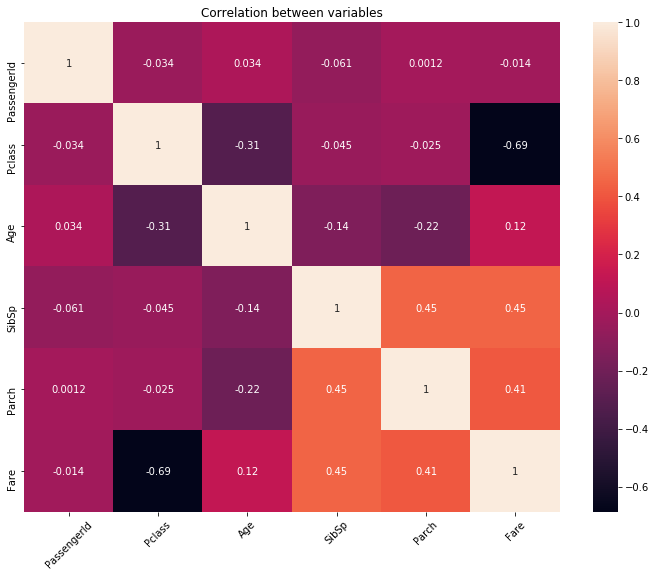

In [1236]:
#checking for correlation using spearman method
plt.figure(figsize=(12,9))
cor=data_corr.corr(method = 'spearman')
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot = True)
plt.xticks( rotation=45)
plt.title('Correlation between variables')
plt.show

###Bivariate plots

####1. Age versus Survival

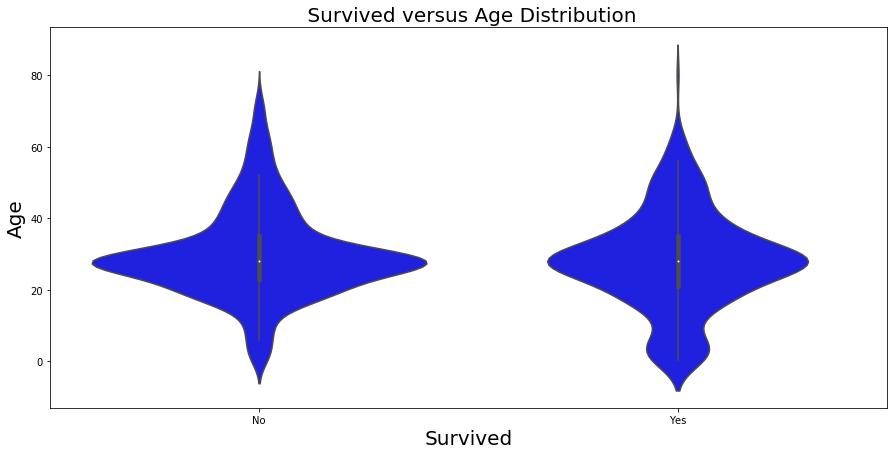

In [1237]:

#A violin plot of age against survival
plt.figure(figsize = (15,7))
sns.violinplot(x=data['Survived'], y=data['Age'], color='Blue')
plt.xticks([0,1],  ['No',  'Yes'])
plt.ylabel('Age',fontsize = 20)
plt.xlabel('Survived',fontsize = 20)
plt.title(' Survived versus Age Distribution',fontsize = 20)
plt.show()

* People in their late twentie make the highest number of people that did not survive and those that survived.
* This could be because the dataset's modal age range is the late 20s.


####2. Sex versus Survival

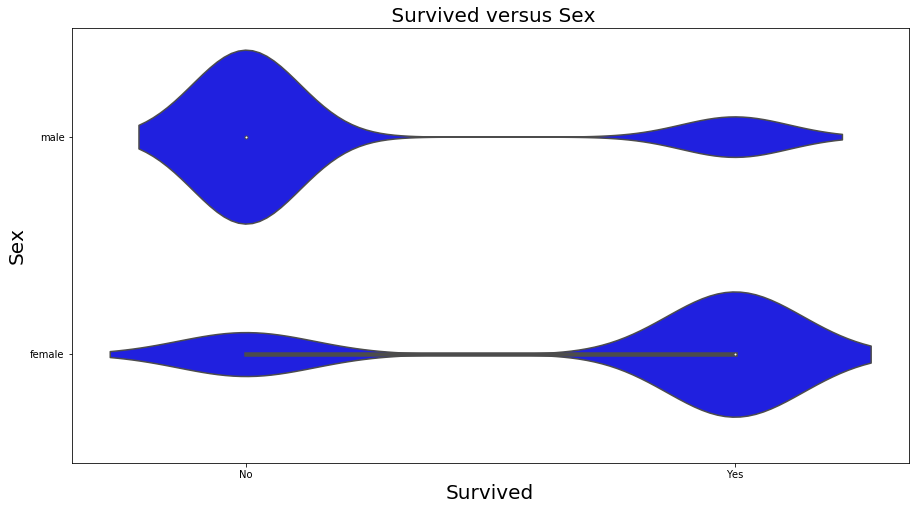

In [1238]:
#A violin plot of age against survival
plt.figure(figsize = (15,8))
sns.violinplot(x=data['Survived'], y=data['Sex'], color='Blue')
plt.xticks([0,1], ['No',  'Yes'])
plt.ylabel('Sex',fontsize = 20)
plt.xlabel('Survived',fontsize = 20)
plt.title(' Survived versus Sex',fontsize = 20)
plt.show()

* The highest number of of people that survived were females
* The highest number of peopple that pereished were males.

####3. Class versus Survived

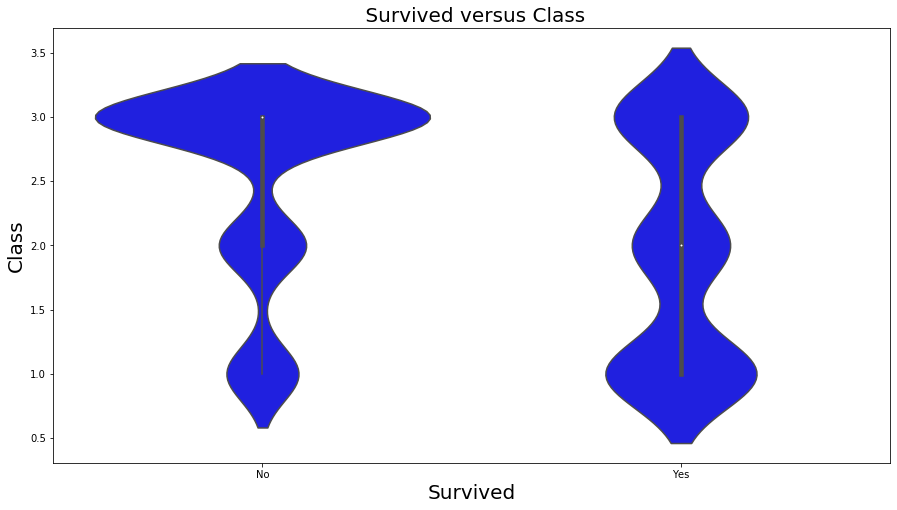

In [1239]:
#A violin plot of class against survival
plt.figure(figsize = (15,8))
sns.violinplot(x=data['Survived'], y=data['Pclass'], color='Blue')
plt.xticks([0,1], ['No',  'Yes'])
plt.ylabel('Class',fontsize = 20)
plt.xlabel('Survived',fontsize = 20)
plt.title(' Survived versus Class',fontsize = 20)
plt.show()

* The highest number of people that did not survive were in the 3rd class
* The highest number of people that survices were in first class.

####4. Fare versus Survival

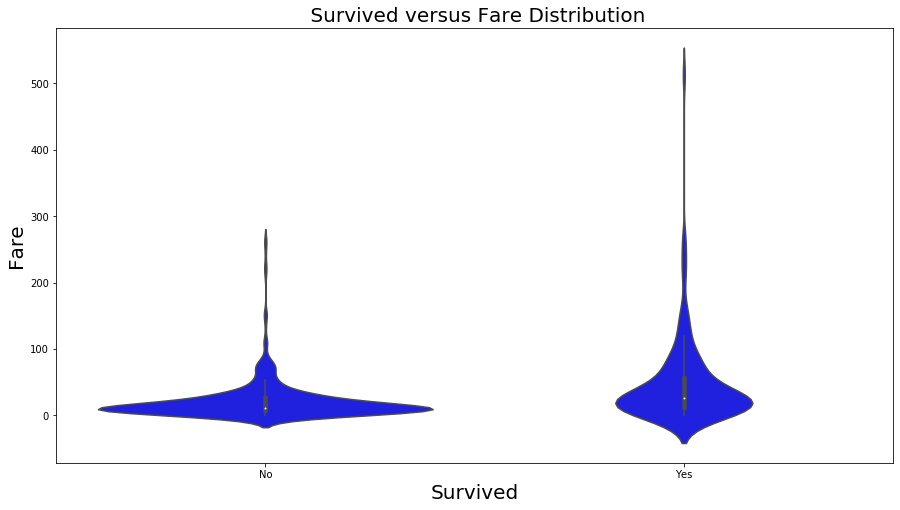

In [1240]:
#A violin plot of fare against survival
plt.figure(figsize = (15,8))
sns.violinplot(x=data['Survived'], y=data['Fare'], color='Blue')
plt.xticks([0,1], ['No',  'Yes'])
plt.ylabel('Fare',fontsize = 20)
plt.xlabel('Survived',fontsize = 20)
plt.title(' Survived versus Fare Distribution',fontsize = 20)
plt.show()

* A high number of people that survived and those that perished both paid minimal fare.
* The high number of survivors and those that perished in this category could be because a majority of the passengers were in this category hence the high number of survivors and those that did not survive.

###Scatter blots

####1. Age against class

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(10.050000000000011, 0.5, 'Age')

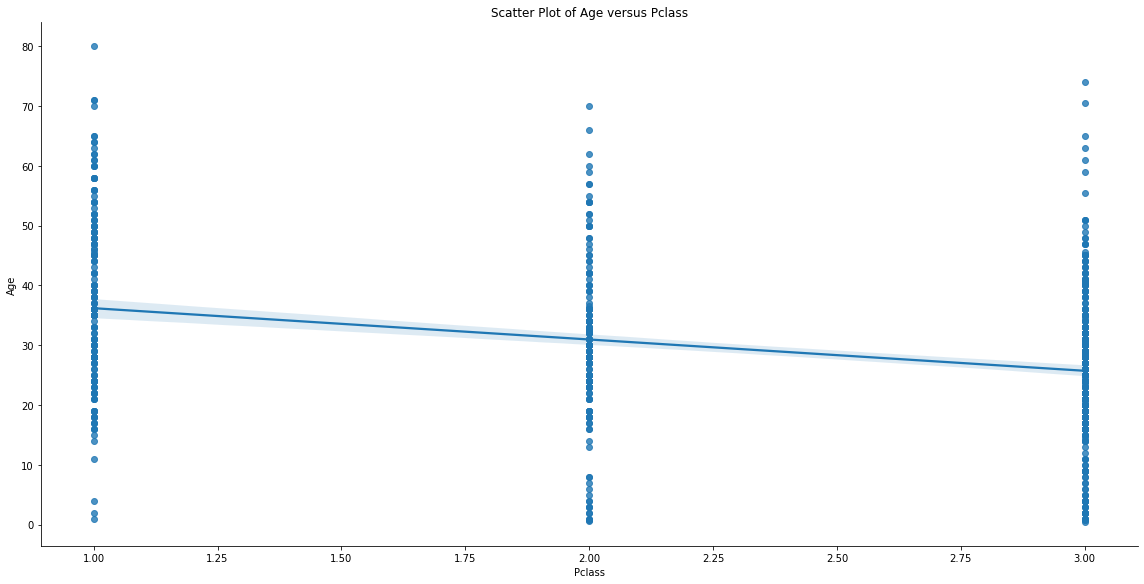

In [1241]:
# Scatterplot of age versus class
sns.lmplot('Pclass', 'Age',data=data,fit_reg=True,size=8,aspect =2)

plt.title('Scatter Plot of Age versus Pclass')

plt.xlabel('Pclass')

plt.ylabel('Age')

* In first class a majority of passengers were from 20 years to 80 years
* In 2nd class the age representation was balanced.
* In 3rd class most passengers were below 50 years.

#Feature Engineering

####Getting dummies for categorical data

In [0]:
data = pd.get_dummies(data, columns=['Sex','Embarked'])

In [1243]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


In [1244]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

#Modeling

In [0]:
X = data[[ 'Pclass','Age', 'SibSp', 'Parch','Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = data[['Survived']]

####KNN classification with unsplit data

In [1246]:
# fitting data into the classifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X, y)

# our predictions
y_pred = classifier.predict(X)

# evaluating the classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("The accuracy score is:",accuracy_score(y, y_pred))

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

The accuracy score is: 0.8211473565804275
[[488  61]
 [ 98 242]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       549
           1       0.80      0.71      0.75       340

    accuracy                           0.82       889
   macro avg       0.82      0.80      0.81       889
weighted avg       0.82      0.82      0.82       889



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [1247]:

#Perform the K-Nearest Neighbors Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('The accuracy score is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67        49
           1       0.59      0.50      0.54        40

    accuracy                           0.62        89
   macro avg       0.61      0.61      0.61        89
weighted avg       0.61      0.62      0.61        89

[[35 14]
 [20 20]]
The accuracy score is : 0.6179775280898876


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


####KNN classification with a 20-80 split

In [0]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [0]:
#fitting and scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1250]:
#KNN where K is 5
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [1252]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[101  17]
 [ 17  43]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       118
           1       0.72      0.72      0.72        60

    accuracy                           0.81       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



####KNN classification with a 30-70 split.

In [1253]:

#K-Nearest Neighbors Classifier on 70% training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# prediction outputs

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('The accuracy score is :',accuracy_score(y_pred,y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.78      0.81      0.79       171
           1       0.63      0.58      0.61        96

    accuracy                           0.73       267
   macro avg       0.70      0.70      0.70       267
weighted avg       0.72      0.73      0.72       267

[[138  33]
 [ 40  56]]
The accuracy score is : 0.7265917602996255


####KNN classification with a 40-60 split


In [1254]:
#K-Nearest Neighbors Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
model = KNeighborsClassifier()
#Fitting data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# # Prediction output

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('The accuracy score is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       221
           1       0.63      0.55      0.58       135

    accuracy                           0.71       356
   macro avg       0.69      0.67      0.68       356
weighted avg       0.70      0.71      0.70       356

[[177  44]
 [ 61  74]]
The accuracy score is : 0.7050561797752809


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


####KNN classification with a 50-50 split

In [1255]:
#Perform the K-Nearest Neighbors Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Prediction output

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('The accuracy score is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       278
           1       0.59      0.59      0.59       167

    accuracy                           0.69       445
   macro avg       0.67      0.67      0.67       445
weighted avg       0.69      0.69      0.69       445

[[209  69]
 [ 69  98]]
The accuracy score is : 0.6898876404494382


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


####Optimization through gridsearch

In [1256]:

model = KNeighborsClassifier()
knn_range = list(range(1,10))
weights_options = ['uniform','distance']
knn_grid = dict(n_neighbors=knn_range, weights = weights_options)
grid_search = GridSearchCV(model, knn_grid, cv=10, scoring = 'precision')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [1257]:
grid.cv_results_

{'mean_fit_time': array([0.00378916, 0.00364189, 0.00384126, 0.00357947, 0.00367987,
        0.00399561, 0.00404403, 0.00409691, 0.00350707, 0.00366192,
        0.00367544, 0.00396168, 0.00371525, 0.00362639, 0.00367265,
        0.00467157, 0.00407946, 0.00377519]),
 'mean_score_time': array([0.00402563, 0.00244005, 0.00385649, 0.00257566, 0.00373607,
        0.00257885, 0.00495508, 0.00265117, 0.00368586, 0.00247459,
        0.00393703, 0.00268238, 0.00409548, 0.00260677, 0.00349109,
        0.00356987, 0.00418861, 0.00253925]),
 'mean_test_score': array([0.57584932, 0.57584932, 0.60645327, 0.58030112, 0.60901115,
        0.60144465, 0.65830794, 0.61492149, 0.65163782, 0.64661028,
        0.68027541, 0.64543768, 0.64706871, 0.63342408, 0.66580145,
        0.63895892, 0.63940191, 0.63951725]),
 'param_n_neighbors': masked_array(data=[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    Fal

In [1258]:
print ("Best Accuracy Score: ",str(grid.best_score_))
print ("Best Parameters: ",str(grid.best_params_))
print ("Best Estimators: ",str(grid.best_estimator_))

Best Accuracy Score:  0.6802754108636462
Best Parameters:  {'n_neighbors': 6, 'weights': 'uniform'}
Best Estimators:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


In [0]:
y_pred = grid.predict(X_test)

In [1260]:
#calculation of accuracy

print('The accuracy :',accuracy_score(y_pred,y_test))

The accuracy : 0.7033707865168539


#Conclusion: KNN

The model with a 80-20 split whrere the training dataset was 80% had the highest accuracy score of 78% which means the larger the training data the better the model performance.

#Spam Mail Classification

###Load Dataset

In [1261]:
#loading data
nb=pd.read_csv('spambase.data', header=None)
nb.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


###Data Preparation

In [1262]:
#checking for null values
nb.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64

In [1263]:
#checking for null values
nb.duplicated().sum()

391

In [0]:
#dropping null values
nb=nb.drop_duplicates(keep='first')

In [1265]:
#confirming the null values have been dropped
nb.duplicated().sum()

0

###Exploratory data analysis

####1.Univariate analysis

a. Distribution

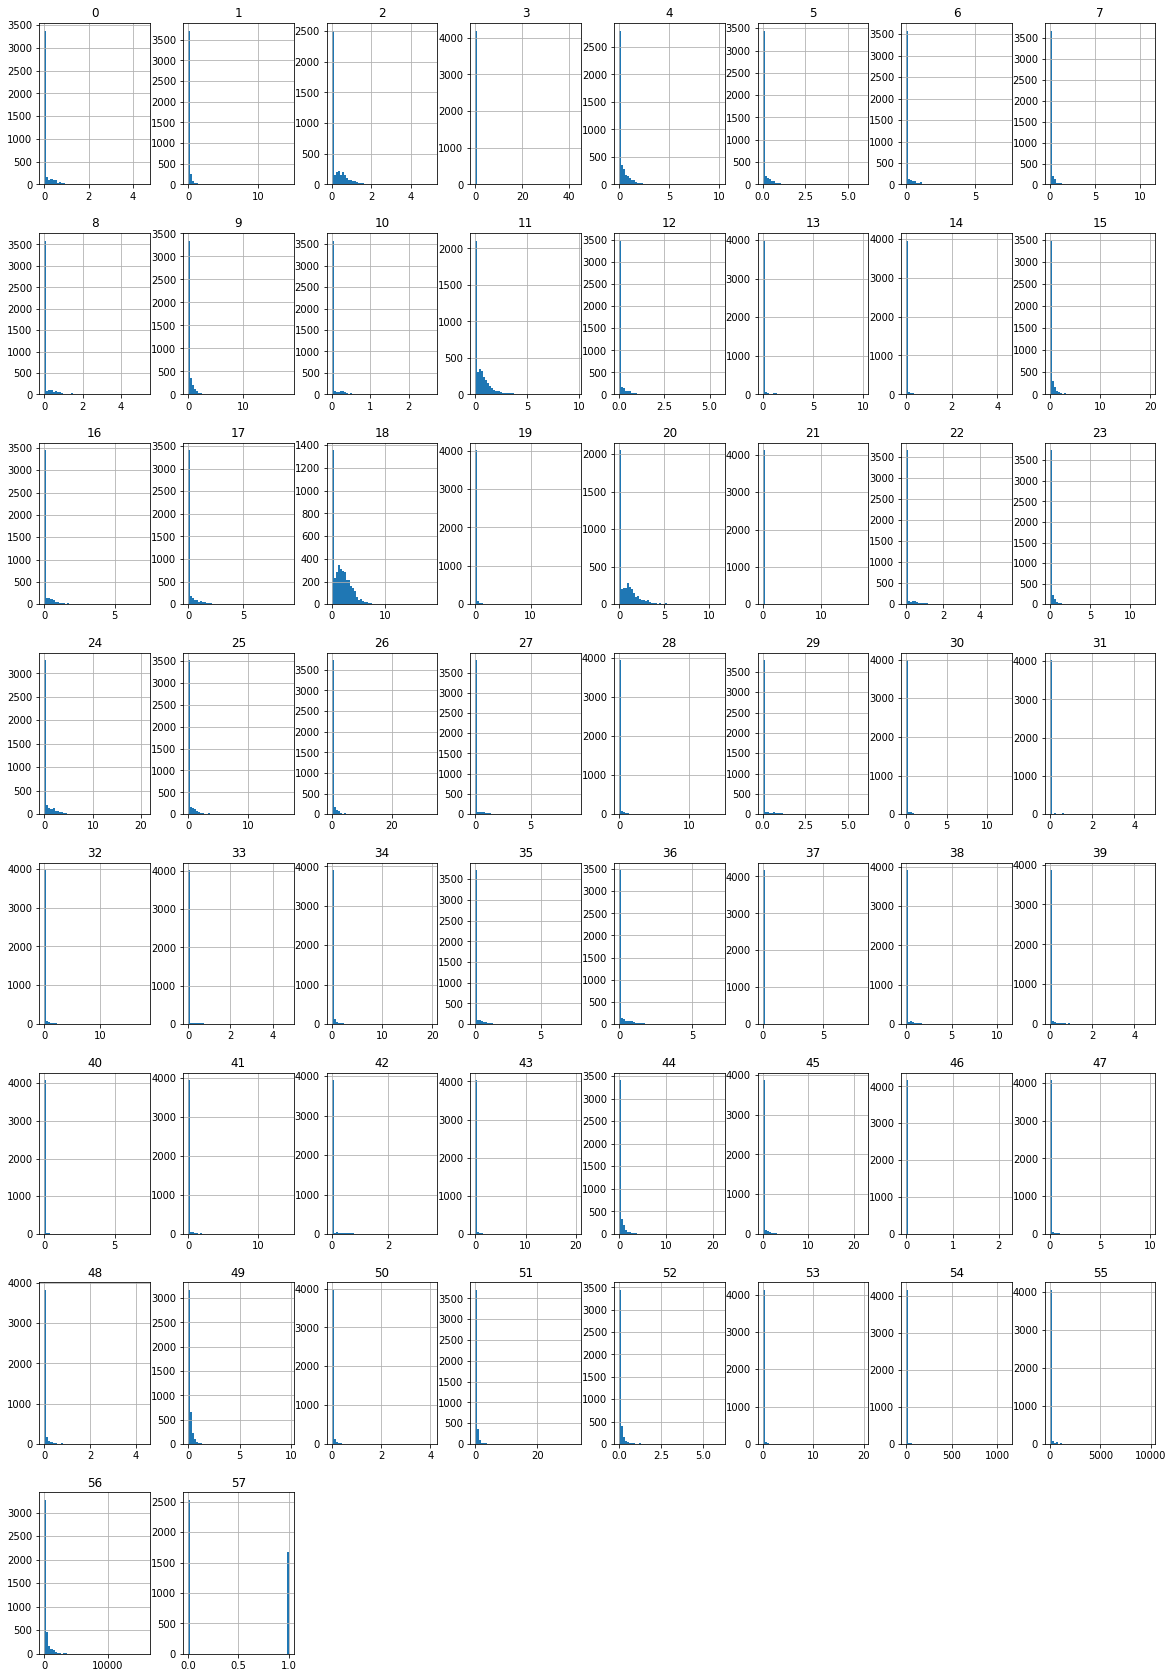

In [1266]:
nb.hist(bins=50,figsize=(20,30))
plt.show()

###Modeling: Naive Bayes

In [0]:
y = nb[57].values
var = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56]

X = nb[var].values



####80% training dataset

In [0]:
# 80% training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler

scaled = pd.DataFrame(StandardScaler().fit_transform(X_train))

In [0]:
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 


In [1271]:
#getting predictions from x
predicted = model.predict(X_test)

print(np.mean(predicted == y_test))


0.8467933491686461


In [1272]:
from sklearn.metrics import classification_report, confusion_matrix
predicted = model.predict(X_test)
nb_mean= pd.DataFrame({'actual' : y_test, 'predicted' : predicted})
nb_mean.head()

,actual,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0


The prediction accuracy is 0.8456057007125891 which is a well-performing classifier.

####70% training dataset

In [1273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler

scaled = pd.DataFrame(StandardScaler().fit_transform(X_train))
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 
#getting predictions from x
predicted = model.predict(X_test)

print(np.mean(predicted == y_test))
from sklearn.metrics import classification_report, confusion_matrix
predicted = model.predict(X_test)
nb_mean= pd.DataFrame({'actual' : y_test, 'predicted' : predicted})
nb_mean.head()


0.836104513064133


,actual,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0


####60% training dataset

In [1274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

from sklearn.preprocessing import StandardScaler

scaled = pd.DataFrame(StandardScaler().fit_transform(X_train))
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 
#getting predictions from x
predicted = model.predict(X_test)

print(np.mean(predicted == y_test))
from sklearn.metrics import classification_report, confusion_matrix
predicted = model.predict(X_test)
nb_mean= pd.DataFrame({'actual' : y_test, 'predicted' : predicted})
nb_mean.head()

0.8283847980997625


,actual,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0


####50% training dataset

In [1275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

from sklearn.preprocessing import StandardScaler

scaled = pd.DataFrame(StandardScaler().fit_transform(X_train))
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 
#getting predictions from x
predicted = model.predict(X_test)

print(np.mean(predicted == y_test))
from sklearn.metrics import classification_report, confusion_matrix
predicted = model.predict(X_test)
nb_mean= pd.DataFrame({'actual' : y_test, 'predicted' : predicted})
nb_mean.head()

0.8251781472684085


,actual,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0


#Conclusion

The highest accuracy of 84% is where the training dataset is 80% of the whole data. This shows that the larger the training data the better the performance of the classifier.